# Achievement Test of Machine Learning Model (AB Test) 

**Problem:**
* A machine learning model is developed for recommending products to customers.
* It is desired to test if is there any significance difference between new incomes between old incomes 

**Details:**
* There are 2 groups of customers.
* A groups is the old one
* B group is the new one

#### Hyphothesis

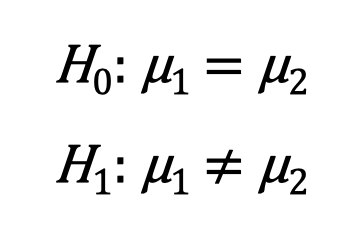

In [169]:
import numpy as np
import pandas as pd

## DATA TYPE I

In [200]:
A = pd.DataFrame([18.89830403, 30.2210749 , 29.04563476, 22.4920932 , 35.10970876,
                  13.87323726, 35.80823442, 21.5936354 , 21.38387437, 42.92928187,
                  13.57767304, 41.10766083, 31.19918858, 12.75681096, 22.45645249,
                  5.85361486, 27.12473097, 24.65607123, 13.72920803, 11.54328435])

In [201]:
B = pd.DataFrame([37.00871884, 25.70439688, 21.29093427, 44.63245383, 35.27408666,
                  48.49138306, 58.48578528, 45.58682585, 38.10983331, 42.47661685,
                  27.29351951, 15.31383582, 29.52874971, 45.10161315, 36.94904297,
                  27.41135159, 50.60037117, 41.04763429, 36.95472512, 49.20921234])

In [202]:
AB_type1 = pd.concat([A, B], axis = 1)

In [203]:
AB_type1.columns = ["A", "B"]

In [204]:
AB_type1.head()

,A,B
0,18.898304,37.008719
1,30.221075,25.704397
2,29.045635,21.290934
3,22.492093,44.632454
4,35.109709,35.274087


## DATA TYPE II

In [205]:
# Group A

In [206]:
GROUP_A = np.arange(len(A))
GROUP_A = pd.DataFrame(GROUP_A)
GROUP_A[:] = "A"
A = pd.concat([A, GROUP_A], axis = 1)

In [207]:
# Group B

In [208]:
GROUP_B = np.arange(len(B))
GROUP_B = pd.DataFrame(GROUP_B)
GROUP_B[:] = "B"
B = pd.concat([B, GROUP_B], axis = 1)

In [209]:
# Concat

In [210]:
AB_type2 = pd.concat([A, B])
AB_type2.columns = ["incomes", "group"]

In [211]:
import seaborn as sns

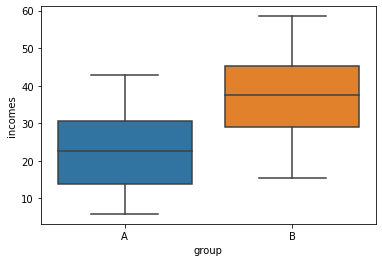

In [212]:
sns.boxplot(x = "group", y = "incomes", data = AB_type2);

## Assumption Control

In [213]:
AB_type1.head()

,A,B
0,18.898304,37.008719
1,30.221075,25.704397
2,29.045635,21.290934
3,22.492093,44.632454
4,35.109709,35.274087


In [214]:
AB_type2.head()

,incomes,group
0,18.898304,A
1,30.221075,A
2,29.045635,A
3,22.492093,A
4,35.109709,A


In [215]:
import scipy.stats as stats

### 1) Normality (Shapiro-Wilks Test) 

In [216]:
stats.shapiro(AB_type1.A)

ShapiroResult(statistic=0.9694178700447083, pvalue=0.742533266544342)

##### H0: There is no significance difference between sampling distribution and theoritical normal distribution

##### Found p-value is greater than alpha (0.05) so we cannot reject hypotheses H0 for group A

In [217]:
stats.shapiro(AB_type1.B)

ShapiroResult(statistic=0.9809114336967468, pvalue=0.9453173875808716)

##### H0: There is no significance difference between sampling distribution and theoritical normal distribution

##### Found p-value is greater than alpha (0.05) so we cannot reject hypotheses H0 for group B

### 2) Varient Homogeneity

In [218]:
stats.levene(AB_type1.A, AB_type1.B)

LeveneResult(statistic=0.03118595099989241, pvalue=0.8607640205651684)

##### H0: Varients are homogeneous

##### Obtained pvalue is greater than alpha (0.05) so we can not reject hypotheses H0

## Application of Test

In [222]:
test_stats, pvalue = stats.ttest_ind(AB_type1.A, AB_type1.B, equal_var = True)

In [228]:
print(f"Test Statistics: {test_stats:.3f}\nP-Value: {pvalue:.5f}")

Test Statistics: -4.199
P-Value: 0.00016


##### H0: Population means of group A and group B are equals eachother

##### Found p-value is lower than alpha (0.05) so we can reject hypotheses H0